In [1210]:
# Import relevant packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
import statistics as stat
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [1211]:
# Load data
pd.set_option('display.max_columns', None)
df = pd.read_csv('medical_clean.csv')

In [1212]:
# View dataframe
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [1213]:
# View dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [1214]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [1215]:
# Looks like there are no obvious outliers, and no values missing.

In [1216]:
# Let's drop columns we aren't going to use (because they don't hold data we can use).
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID'], axis = 1, inplace=True)

In [1217]:
# I don't want to include other columns for various reasons. State, City, County, and Zip are categorical, and the latter three have hundreds or thousands of different categories. This will overcomplicate the model and dataset, and are also somewhat redunant since we are using Latitude and Longitude. Furthermore, there is likely to be multicollinearity with these variables since they are all related to location.
print(df['County'].nunique())
print(df['City'].nunique())
print(df['Zip'].nunique())
df.drop(['County', 'City', 'Zip', 'State'], axis = 1, inplace=True)

1607
6072
8612


In [1218]:
# Job and timezone are other categorical variables with too many categories and/or likely no useful (to the model) information.
df.drop(['Job', 'TimeZone'], axis = 1, inplace=True)

In [1219]:
# I also want to drop ReAdmis - it is my target variable for the next task, and I know ReAdmis and Initial_days are highly correlated. I'd like to use a model that doesn't include that as an explantory variable.
df.drop(['ReAdmis'], axis = 1, inplace=True)

In [1220]:
# Similarly for TotalCharge: it is essentially a function of Initial_days, since hospitals charge for length of stay. It doesn't make sense to use Total_charge as a predictor of Inital_days.
df.drop(['TotalCharge'], axis = 1, inplace=True)

In [1221]:
# I need to rename the last 8 columns - if I don't the numbers in the column names will cause an error later.
df.rename(columns = {'Item1': 'Timely_admission', 'Item2': 'Timely_treatment', 'Item3': 'Timely_visits', 'Item4': 'Reliability',
                     'Item5': 'Options', 'Item6': 'Hours_of_treatment', 'Item7': 'Courteous_staff', 'Item8': 'Active_listening'}, inplace=True)


In [1222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Population          10000 non-null  int64  
 3   Area                10000 non-null  object 
 4   Children            10000 non-null  int64  
 5   Age                 10000 non-null  int64  
 6   Income              10000 non-null  float64
 7   Marital             10000 non-null  object 
 8   Gender              10000 non-null  object 
 9   VitD_levels         10000 non-null  float64
 10  Doc_visits          10000 non-null  int64  
 11  Full_meals_eaten    10000 non-null  int64  
 12  vitD_supp           10000 non-null  int64  
 13  Soft_drink          10000 non-null  object 
 14  Initial_admin       10000 non-null  object 
 15  HighBlood           10000 non-null  object 
 16  Strok

# Visualizations: Univariate

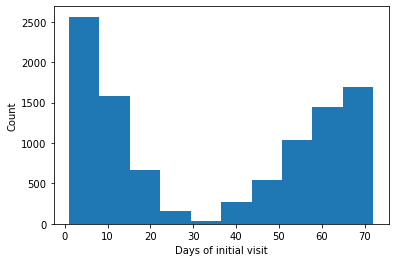

In [1223]:
plt.hist(df['Initial_days'])
plt.xlabel('Days of initial visit')
plt.ylabel('Count');

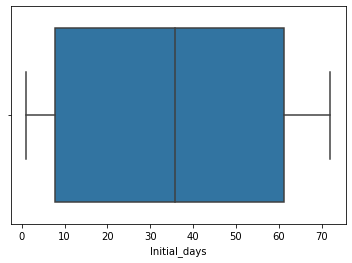

In [1224]:
sb.boxplot(data = df, x = 'Initial_days');

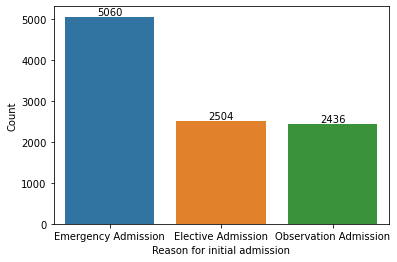

In [1225]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Initial_admin', data=df)
graph.set(xlabel="Reason for initial admission", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

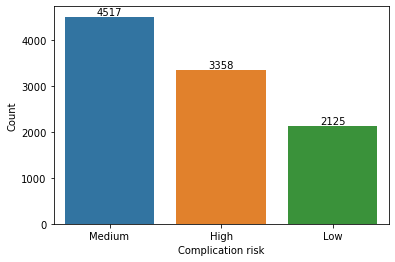

In [1226]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Complication_risk', data=df)
graph.set(xlabel="Complication risk", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

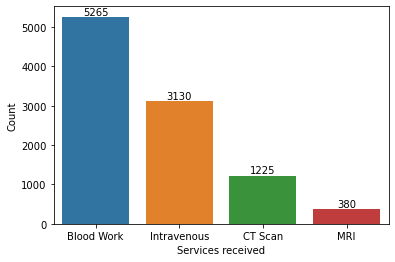

In [1227]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Services', data=df)
graph.set(xlabel="Services received", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

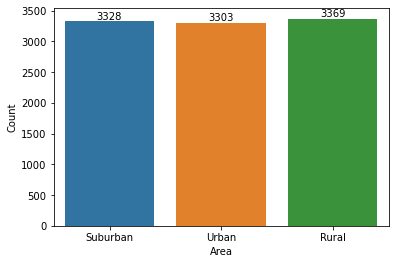

In [1228]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Area', data=df)
graph.set(xlabel="Area", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

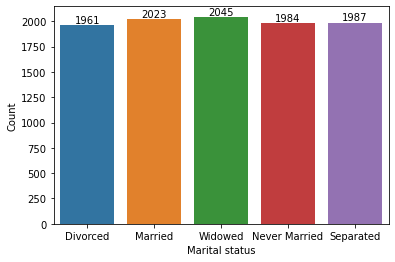

In [1229]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Marital', data=df)
graph.set(xlabel="Marital status", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

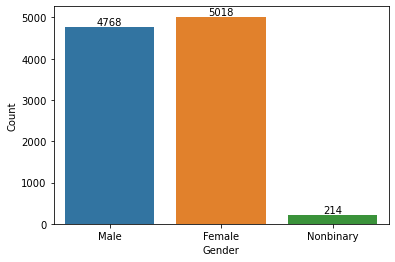

In [1230]:
fig, ax1 = plt.subplots()
graph = sb.countplot(ax=ax1,x='Gender', data=df)
graph.set(xlabel="Gender", ylabel = "Count")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom')

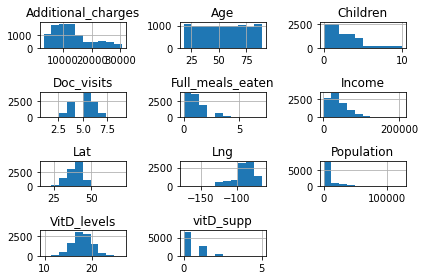

In [1231]:
df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 
    'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Additional_charges']].hist()
plt.tight_layout();

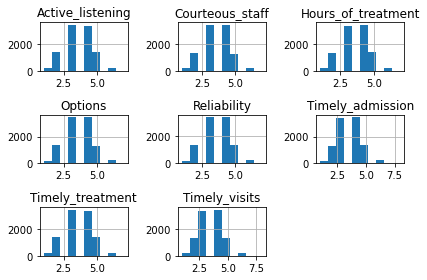

In [1232]:
df[['Timely_admission', 'Timely_treatment', 'Timely_visits', 'Reliability', 
    'Options', 'Hours_of_treatment', 'Courteous_staff', 'Active_listening']].hist()
plt.tight_layout();

# Visualizations: Bivariate

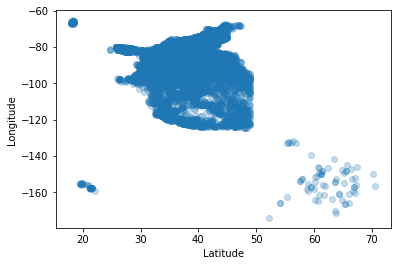

In [1233]:
plt.scatter(df['Lat'], df['Lng'], alpha=0.25)
plt.xlabel('Latitude')
plt.ylabel('Longitude');

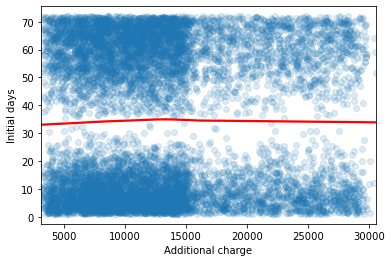

In [1234]:
g = sb.regplot(x='Additional_charges', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Additional charge", ylabel = "Initial days");

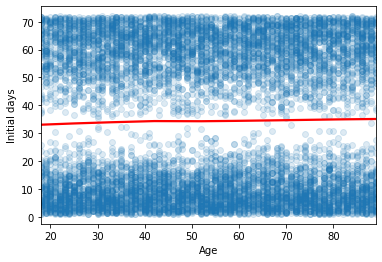

In [1235]:
g = sb.regplot(x='Age', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Age", ylabel = "Initial days");

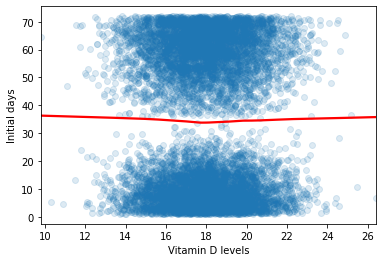

In [1236]:
g = sb.regplot(x='VitD_levels', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Vitamin D levels", ylabel = "Initial days");

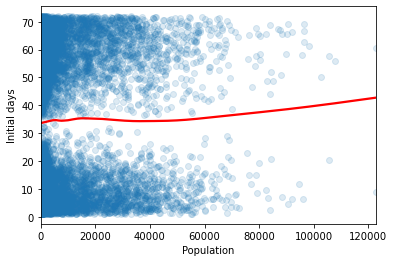

In [1237]:
g = sb.regplot(x='Population', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Population", ylabel = "Initial days");

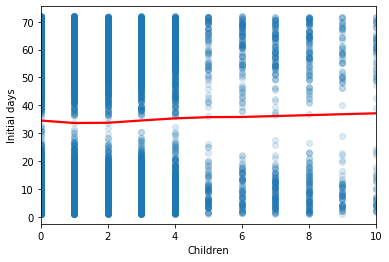

In [1238]:
g = sb.regplot(x='Children', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Children", ylabel = "Initial days");

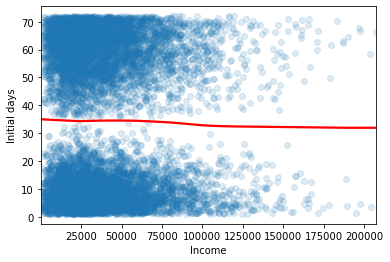

In [1239]:
g = sb.regplot(x='Income', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Income", ylabel = "Initial days");

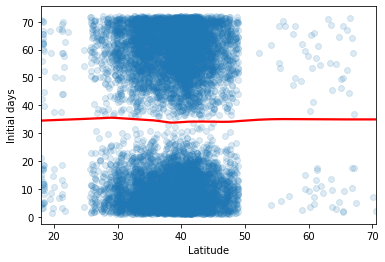

In [1240]:
g = sb.regplot(x='Lat', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Latitude", ylabel = "Initial days");

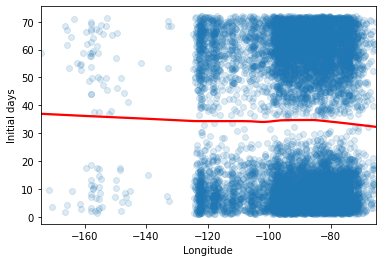

In [1241]:
g = sb.regplot(x='Lng', y='Initial_days', 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Longitude", ylabel = "Initial days");

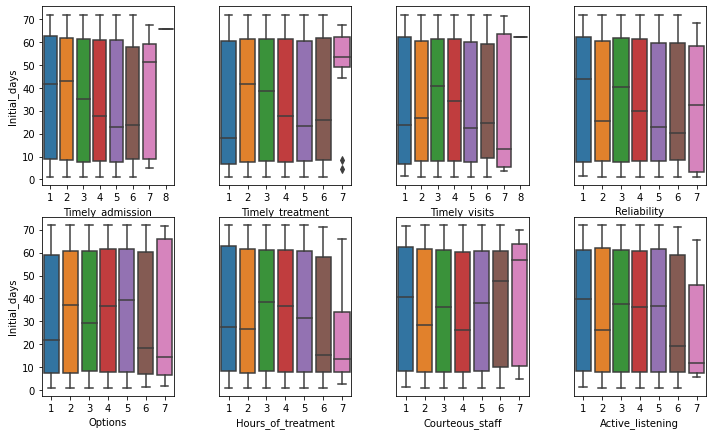

In [1242]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6))
plt.tight_layout()
ax1 = sb.boxplot(y="Initial_days", x= "Timely_admission", data=df, ax=axes[0, 0])
ax2 = sb.boxplot(y="Initial_days", x= "Timely_treatment", data=df,  ax=axes[0, 1])
ax2.axes.get_yaxis().set_visible(False)
ax3 = sb.boxplot(y="Initial_days", x= "Timely_visits", data=df,  ax=axes[0, 2])
ax3.axes.get_yaxis().set_visible(False)
ax4 = sb.boxplot(y="Initial_days", x= "Reliability", data=df,  ax=axes[0, 3])
ax4.axes.get_yaxis().set_visible(False)
ax5 = sb.boxplot(y="Initial_days", x= "Options", data=df,  ax=axes[1, 0])
ax6 = sb.boxplot(y="Initial_days", x= "Hours_of_treatment", data=df,  ax=axes[1,1])
ax6.axes.get_yaxis().set_visible(False)
ax7 = sb.boxplot(y="Initial_days", x= "Courteous_staff", data=df,  ax=axes[1,2])
ax7.axes.get_yaxis().set_visible(False)
ax8 = sb.boxplot(y="Initial_days", x= "Active_listening", data=df,  ax=axes[1,3])
ax8.axes.get_yaxis().set_visible(False);

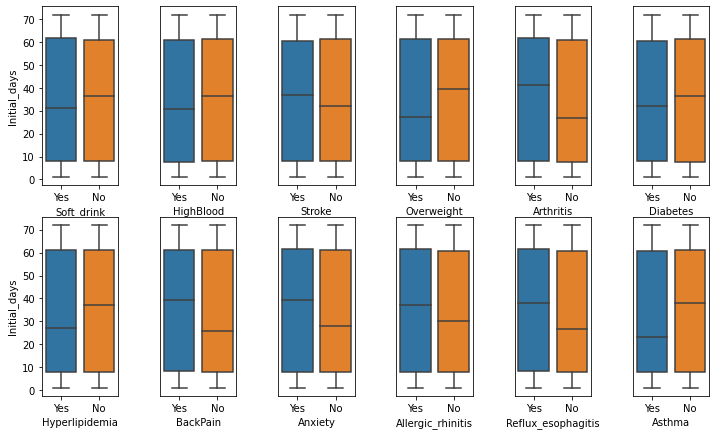

In [1243]:
f, axes = plt.subplots(nrows=2, ncols=6, figsize=(10,6))
plt.tight_layout()
ax1 = sb.boxplot(y="Initial_days", x= "Soft_drink", data=df, ax=axes[0, 0], order=("Yes", "No"))
ax2 = sb.boxplot(y="Initial_days", x= "HighBlood", data=df,  ax=axes[0, 1],order=("Yes", "No"))
ax2.axes.get_yaxis().set_visible(False)
ax3 = sb.boxplot(y="Initial_days", x= "Stroke", data=df,  ax=axes[0, 2],order=("Yes", "No"))
ax3.axes.get_yaxis().set_visible(False)
ax4 = sb.boxplot(y="Initial_days", x= "Overweight", data=df,  ax=axes[0, 3],order=("Yes", "No"))
ax4.axes.get_yaxis().set_visible(False)
ax5 = sb.boxplot(y="Initial_days", x= "Arthritis", data=df,  ax=axes[0, 4], order=("Yes", "No"))
ax5.axes.get_yaxis().set_visible(False)
ax6 = sb.boxplot(y="Initial_days", x= "Diabetes", data=df,  ax=axes[0,5],order=("Yes", "No"))
ax6.axes.get_yaxis().set_visible(False)
ax7 = sb.boxplot(y="Initial_days", x= "Hyperlipidemia", data=df,  ax=axes[1,0],order=("Yes", "No"))
ax8 = sb.boxplot(y="Initial_days", x= "BackPain", data=df,  ax=axes[1,1],order=("Yes", "No"))
ax8.axes.get_yaxis().set_visible(False)
ax9 = sb.boxplot(y="Initial_days", x= "Anxiety", data=df,  ax=axes[1,2],order=("Yes", "No"))
ax9.axes.get_yaxis().set_visible(False)
ax10 = sb.boxplot(y="Initial_days", x= "Allergic_rhinitis", data=df,  ax=axes[1,3],order=("Yes", "No"))
ax10.axes.get_yaxis().set_visible(False)
ax11 = sb.boxplot(y="Initial_days", x= "Reflux_esophagitis", data=df,  ax=axes[1,4],order=("Yes", "No"))
ax11.axes.get_yaxis().set_visible(False)
ax12 = sb.boxplot(y="Initial_days", x= "Asthma", data=df,  ax=axes[1,5],order=("Yes", "No"))
ax12.axes.get_yaxis().set_visible(False);

In [1244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 10000 non-null  float64
 1   Lng                 10000 non-null  float64
 2   Population          10000 non-null  int64  
 3   Area                10000 non-null  object 
 4   Children            10000 non-null  int64  
 5   Age                 10000 non-null  int64  
 6   Income              10000 non-null  float64
 7   Marital             10000 non-null  object 
 8   Gender              10000 non-null  object 
 9   VitD_levels         10000 non-null  float64
 10  Doc_visits          10000 non-null  int64  
 11  Full_meals_eaten    10000 non-null  int64  
 12  vitD_supp           10000 non-null  int64  
 13  Soft_drink          10000 non-null  object 
 14  Initial_admin       10000 non-null  object 
 15  HighBlood           10000 non-null  object 
 16  Strok

# Part IV

In [1245]:
# Create dummies for categorical variables
df_cats = df[['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain']]
df_dummies = pd.get_dummies(data=df_cats, drop_first=True)
df_new = df.join(df_dummies)

In [1246]:
# Drop old categorical columns
df_new.drop(['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain'], axis = 1, inplace=True)

In [1247]:
# View new dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Lat                                  10000 non-null  float64
 1   Lng                                  10000 non-null  float64
 2   Population                           10000 non-null  int64  
 3   Children                             10000 non-null  int64  
 4   Age                                  10000 non-null  int64  
 5   Income                               10000 non-null  float64
 6   VitD_levels                          10000 non-null  float64
 7   Doc_visits                           10000 non-null  int64  
 8   Full_meals_eaten                     10000 non-null  int64  
 9   vitD_supp                            10000 non-null  int64  
 10  Initial_days                         10000 non-null  float64
 11  Additional_charges           

In [1248]:
# Create initial model with all existing variables
df_new['intercept'] = 1

In [1249]:
X = df_new[['intercept', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Doc_visits', 
'Full_meals_eaten', 'vitD_supp', 'Timely_admission', 'VitD_levels', 'Additional_charges',
'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment', 
'Courteous_staff', 'Active_listening', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 
'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 
'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 
'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 
'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan', 
'Services_Intravenous', 'Services_MRI', 'Complication_risk_Low', 'Complication_risk_Medium', 'BackPain_Yes']]

y = df_new['Initial_days']

In [1250]:
Xc = sm.add_constant(X)
ln = sm.OLS(y,Xc)
results = ln.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.284
Date:                Sun, 12 Sep 2021   Prob (F-statistic):             0.0944
Time:                        16:27:26   Log-Likelihood:                -46859.
No. Observations:               10000   AIC:                         9.381e+04
Df Residuals:                    9953   BIC:                         9.415e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
intercept                              34.3678      4.534      7.579      0.000      25.480      43.256
Lat                                    -0.0355      0.050     -0.706      0.480      -0.134       0.063
Lng                                    -0.0162      0.017     -0.929      0.353      -0.050       0.018
Population                           2.804e-05   1.82e-05      1.540      0.124   -7.65e-06    6.37e-05
Children                                0.2834      0.122      2.327      0.020       0.045       0.522
Age                                     0.0533      0.039      1.372      0.170      -0.023       0.129
Income                              -1.233e-05   9.24e-06     -1.335      0.182   -3.04e-05    5.78e-06
Doc_visits                             -0.1707      0.252     -0.677      0.498      -0.665       0.323
Full_meals_eaten                       -0.4253      0.262     -1.626      0.104      -0.938       0.087
vitD_supp                               0.6345      0.419      1.514      0.130      -0.187       1.456
Timely_admission                       -0.8292      0.379     -2.187      0.029      -1.572      -0.086
VitD_levels                            -0.0357      0.131     -0.273      0.785      -0.292       0.221
Additional_charges                     -0.0001      0.000     -0.885      0.376      -0.000       0.000
Timely_treatment                        0.2377      0.350      0.679      0.497      -0.448       0.924
Timely_visits                           0.0295      0.323      0.091      0.927      -0.604       0.663
Reliability                            -0.3468      0.288     -1.206      0.228      -0.911       0.217
Options                                 0.0260      0.303      0.086      0.932      -0.568       0.620
Hours_of_treatment                     -0.0352      0.313     -0.112      0.911      -0.648       0.578
Courteous_staff                         0.3513      0.295      1.192      0.233      -0.226       0.929
Active_listening                       -0.0486      0.277     -0.175      0.861      -0.592       0.495
Area_Suburban                           0.3240      0.644      0.503      0.615      -0.938       1.586
Area_Urban                              0.7907      0.646      1.224      0.221      -0.475       2.057
Marital_Married                         1.2060      0.835      1.444      0.149      -0.432       2.844
Marital_Never Married                   1.8454      0.839      2.199      0.028       0.201       3.490
Marital_Separated                       1.7674      0.838      2.109      0.035       0.124       3.410
Marital_Widowed                         1.7200      0.833      2.065      0.039       0.087       3.353
Gender_Male                             0.4625      0.534      0.86

In [1251]:
# Quite the model. An R-squared value of .006 says that even with all of the variables we included, only 0.6% of our model fit the observed data. When adjusted for the number of variables, it is only 0.01. Womp-womp.
# However, our model violates several assumptions of a working multiple regression model, so we'll need to reduce it.


In [1252]:
# Check for Multicollinearity: Let's take a look at a correlation matrix to see if any variables stand out.
correlation_matrix = X.corr()
print (correlation_matrix)

                                     intercept       Lat       Lng  \
intercept                                  NaN       NaN       NaN   
Lat                                        NaN  1.000000 -0.112348   
Lng                                        NaN -0.112348  1.000000   
Population                                 NaN -0.207572 -0.031979   
Children                                   NaN  0.006373 -0.014114   
Age                                        NaN -0.007270  0.007493   
Income                                     NaN -0.019369 -0.006665   
Doc_visits                                 NaN  0.008380  0.000754   
Full_meals_eaten                           NaN  0.003401 -0.014231   
vitD_supp                                  NaN  0.001285 -0.001961   
Timely_admission                           NaN  0.008614  0.004805   
VitD_levels                                NaN  0.001493 -0.006389   
Additional_charges                         NaN -0.002283  0.000079   
Timely_treatment    

In [1253]:
# And let's check the variance inflation factors (VIF's) - we'll remove any variables with VIF's greater than 10.
df_new.columns = df_new.columns.str.replace(' ', '_')
y, X = dmatrices('Initial_days ~ Lat + Lng + Population + Children + Age + Income + VitD_levels + Doc_visits + Full_meals_eaten + vitD_supp + Additional_charges + Timely_admission + Timely_treatment + Timely_visits + Reliability + Options + Hours_of_treatment + Courteous_staff + Active_listening + Area_Suburban + Area_Urban + Marital_Married + Marital_Never_Married + Marital_Separated + Marital_Widowed + Gender_Male + Gender_Nonbinary + Soft_drink_Yes + Initial_admin_Emergency_Admission + Initial_admin_Observation_Admission + HighBlood_Yes + Stroke_Yes + Overweight_Yes + Arthritis_Yes + Diabetes_Yes + Hyperlipidemia_Yes + Anxiety_Yes + Allergic_rhinitis_Yes + Reflux_esophagitis_Yes + Asthma_Yes + Services_CT_Scan + Services_Intravenous + Services_MRI + Complication_risk_Low + Complication_risk_Medium + BackPain_Yes', df_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variables"] = X.columns

In [1254]:
vif

,VIF Factor,variables
0,297.422295,Intercept
1,1.065333,Lat
2,1.019646,Lng
3,1.053642,Population
4,1.004489,Children
5,9.285875,Age
6,1.004277,Income
7,1.006891,VitD_levels
8,1.004592,Doc_visits
9,1.006025,Full_meals_eaten


In [1255]:
# There was only one variable with a greater than 10 VIF: Additional_charges. We will remove that.
# We should also remove our independent variables with p-values above 0.05. 
# These variables with high p-values are not statistically significant to the changes in our dependent variable, and therefore not helping our model.

X.drop(['Additional_charges', 'Lat', 'Lng', 'Population', 'Age', 'Income', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'VitD_levels', 
         'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment',
        'Courteous_staff', 'Active_listening', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 'Gender_Male',
            'Gender_Nonbinary', 'Soft_drink_Yes', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission',
            'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'Anxiety_Yes',
            'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT_Scan', 'Services_Intravenous',
            'Services_MRI', 'Complication_risk_Low', 'Complication_risk_Medium', 'BackPain_Yes'], axis = 1, inplace=True)


In [1256]:
# Reduced model
Xc = sm.add_constant(X)
ln = sm.OLS(y,Xc)
results = ln.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.906
Date:                Sun, 12 Sep 2021   Prob (F-statistic):             0.0126
Time:                        16:27:27   Log-Likelihood:                -46881.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9994   BIC:                         9.382e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                35.2005      1.021     34.481      0.000      33.199      37.202
Children                  0.2811      0.122      2.312      0.021       0.043       0.519
Timely_admission         -0.5731      0.255     -2.249      0.025      -1.073      -0.074
Marital_Never_Married     1.1640      0.723      1.610      0.107      -0.253       2.581
Marital_Separated         1.2101      0.722      1.675      0.094      -0.206       2.626
Marital_Widowed           1.0295      0.715      1.439      0.150      -0.373       2.432
==============================================================================
Omnibus:                    41311.402   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1283.070
Skew:                           0.071   Prob(JB):                    2.43e-279
Kurtosis:                       1.251   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1257]:
# Our reduced model looks a lot different, and no better. Since we removed so many variables, our r-squared came down, but our adjusted r-squared stayed at 0.01. Our model still does not fit well.
# Also, three of our p-values are now above 0.05.

In [1258]:
# Let's further reduce the model.
X.drop(['Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed'],axis = 1, inplace=True)

In [1259]:
# Further reduced model
Xc = sm.add_constant(X)
ln = sm.OLS(y,Xc)
results = ln.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.015
Date:                Sun, 12 Sep 2021   Prob (F-statistic):            0.00665
Time:                        16:27:27   Log-Likelihood:                -46883.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9997   BIC:                         9.379e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.8822      0.968     37.061      0.000      33.984      37.780
Children             0.2738      0.122      2.252      0.024       0.035       0.512
Timely_admission    -0.5687      0.255     -2.231      0.026      -1.068      -0.069
==============================================================================
Omnibus:                    41245.176   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1285.499
Skew:                           0.071   Prob(JB):                    7.20e-280
Kurtosis:                       1.249   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1260]:
y, X = dmatrices('Initial_days ~ Timely_admission + Children', df_new, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["variables"] = X.columns

In [1261]:
vif

,VIF Factor,variables
0,13.553453,Intercept
1,1.000005,Timely_admission
2,1.000005,Children


In [1262]:
OLS_model = sm.OLS(y,X).fit()  # training the model
predicted_values = OLS_model.predict()  # predicted values
residual_values = OLS_model.resid

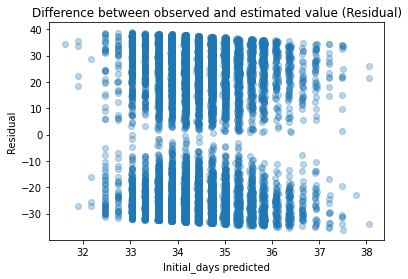

In [1263]:
plt.scatter(predicted_values, residual_values, alpha=0.3)
plt.title('Difference between observed and estimated value (Residual)')
plt.xlabel('Initial_days predicted')
plt.ylabel('Residual');

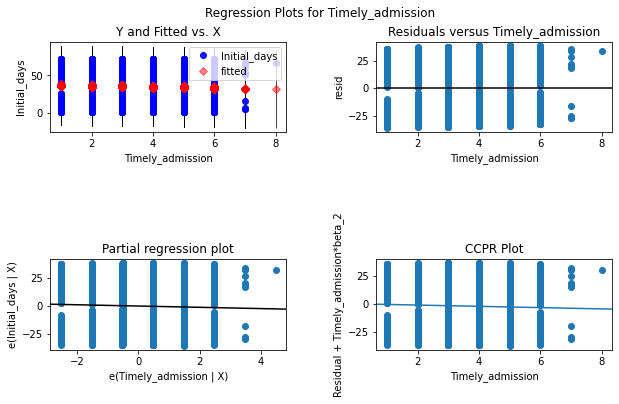

In [1264]:
fig = sm.graphics.plot_regress_exog(results, 'Timely_admission')
fig.set_size_inches(10, 6);

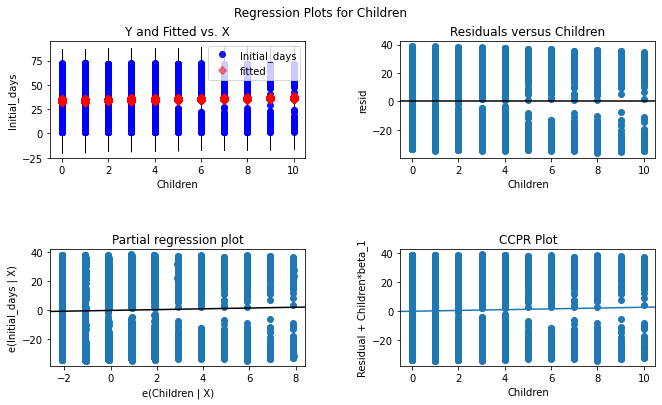

In [1265]:
fig = sm.graphics.plot_regress_exog(results, 'Children')
fig.set_size_inches(10, 6);

In [1267]:
model_df = pd.DataFrame() 
model_df['Predicted value'] = pred_val.tolist()
model_df['Observed value'] = true_val.tolist()
model_df['Residual'] = residual.tolist()

In [1268]:
model_df.head(10)

,Predicted value,Observed value,Residual
0,34.449955,10.585770,-23.864185
1,34.997487,15.129562,-19.867925
2,35.566169,4.772177,-30.793992
3,34.176189,1.714879,-32.461310
4,35.018637,1.254807,-33.763830
5,34.428806,5.957250,-28.471556
6,33.607507,9.058210,-24.549297
7,37.229915,14.228019,-23.001896
8,34.176189,6.180339,-27.995850
9,33.586358,1.632554,-31.953804


In [1269]:
model_df.tail(10)

,Predicted value,Observed value,Residual
9990,34.176189,62.73599,28.559801
9991,34.176189,56.87419,22.698001
9992,34.997487,56.61571,21.618223
9993,32.743910,40.35530,7.611390
9994,36.387467,37.93212,1.544653
9995,34.723721,51.56122,16.837499
9996,35.271254,68.66824,33.396986
9997,34.997487,70.15418,35.156693
9998,33.860124,63.35690,29.496776
9999,35.797636,70.85059,35.052954


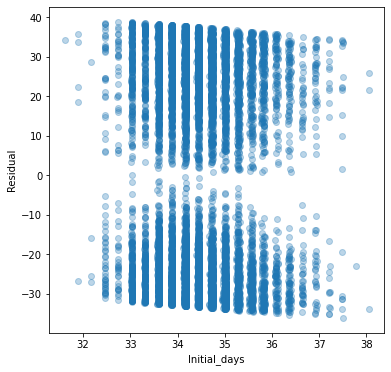

In [1270]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(pred_val, residual, alpha=0.3)
ax.set(xlabel="Initial_days", ylabel = "Residual");

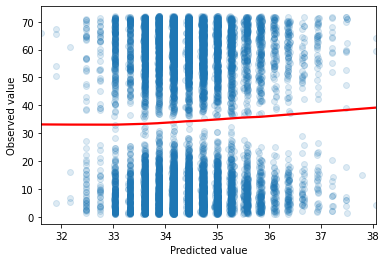

In [1271]:
g = sb.regplot(x=pred_val, y=true_val, 
               lowess=True, data=df, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.set(xlabel="Predicted value", ylabel = "Observed value");